# SNARS - Small Project 5

## P5.1

Complete the missing calculations for the Poisson distribution.

$$
    \mathbb{P}(K=k) = \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!}
$$

$$ 
    \mathbb{E}(K) = \displaystyle \sum_{k=0}^\infty k \cdot \mathbb{P}(K=k) = \sum_{k=0}^\infty k \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} = 0 + \sum_{k=1}^\infty k \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} = 
    \sum_{k=1}^\infty \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{(k-1)!} = 
    {\langle k \rangle} \sum_{k=1}^\infty \dfrac{e^{\langle k \rangle}{\langle k \rangle}^{k-1}}{(k-1)!} = 
    {\langle k \rangle} \sum_{k=0}^\infty \dfrac{e^{\langle k \rangle}{\langle k \rangle}^{k}}{(k)!} = 
    {\langle k \rangle} \sum_{k=0}^\infty \mathbb{P}(K=k) = {\langle k \rangle}
$$

$$
    \mathbb{E}\left(K^2\right) = \displaystyle \sum_{k=0}^\infty k^2 \cdot \mathbb{P}(K=k) =
    \sum_{k=0}^\infty \left(k^2 - k \right) \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} + 
    \sum_{k=0}^\infty k \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} = 
     \sum_{k=0}^\infty \left(k^2 - k \right) \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} + {\langle k \rangle}  \\ = 0 + 0 + \sum_{k=2}^\infty k \left(k - 1 \right) \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{k!} + {\langle k \rangle} 
     = \sum_{k=2}^\infty \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^k}{(k-2)!} + {\langle k \rangle} 
     = {\langle k \rangle}^2\sum_{k=2}^\infty \cdot \dfrac{e^{\langle k \rangle}{\langle k \rangle}^{k-2}}{(k-2)!} + {\langle k \rangle} = {\langle k \rangle}^2 + {\langle k \rangle}
$$

$$
\operatorname{Var}(K) = \mathbb{E}\left(K^2\right) - \left( \mathbb{E}(K) \right)^2 = {\langle k \rangle}^2 + {\langle k \rangle} - {\langle k \rangle}^2 = {\langle k \rangle}
$$

## P5.2

Clustering coefficient
$$ \langle C \rangle = p $$

Check the above analytical result by simulation.

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [4]:
def clustering_coefficient_simulation(N: int, p: float, num_graphs: int = 100) -> float:
    result = 0.0
    for _ in range(num_graphs):
        G = nx.generators.erdos_renyi_graph(N, p)
        result += nx.average_clustering(G)
    return result / num_graphs

In [5]:
probabilities = np.linspace(0, 1, 10)

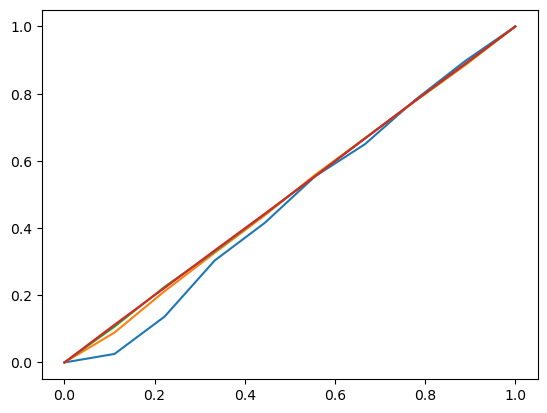

In [6]:
for N in [10, 25, 50, 100]: 
    plt.plot(probabilities, [clustering_coefficient_simulation(N, p) for p in probabilities])

## P5.3

Generate and draw a graph consisting of $4$ community each with
$N = 20$ nodes and the probability of connection within the
community higher than between them. Draw the result. How it
depends on the parameter values?

In [7]:
import seaborn as sns

In [8]:
num_of_vertices = 20 
num_of_communities = 4

In [9]:
max_prob = 0.05

In [10]:
between_communities = np.random.rand(num_of_vertices * num_of_communities, num_of_vertices * num_of_communities) * max_prob

In [11]:
for i in range(num_of_communities):
    between_communities[(i*num_of_vertices):((i+1)*num_of_vertices), 
                        (i*num_of_vertices):((i+1)*num_of_vertices)] = (np.random.rand(num_of_vertices, num_of_vertices) + 1) / 2

In [12]:
probability_matrix = (between_communities + between_communities.T)/2
np.fill_diagonal(probability_matrix, 0)

<AxesSubplot:>

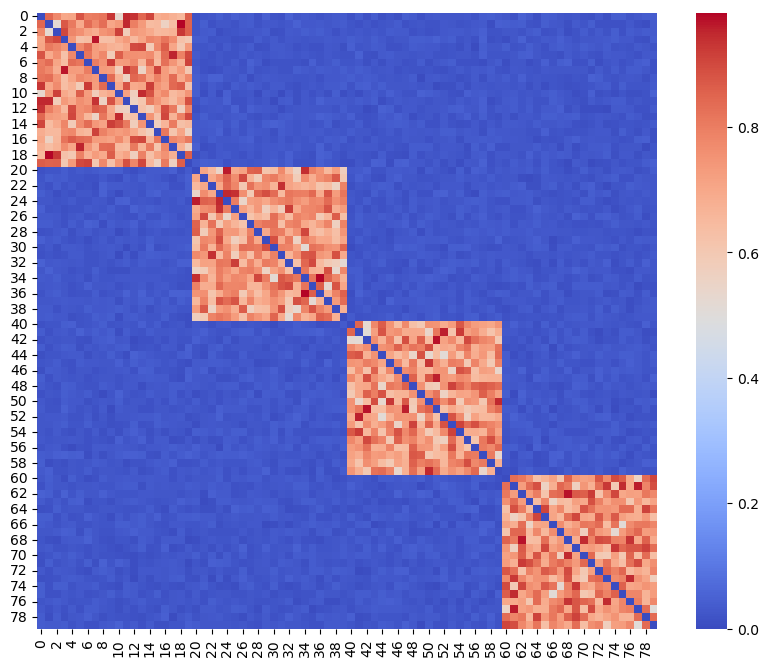

In [13]:
sns.heatmap(probability_matrix, cmap='coolwarm', ax=plt.subplots(figsize=(10,8))[1]) # probability matrix 

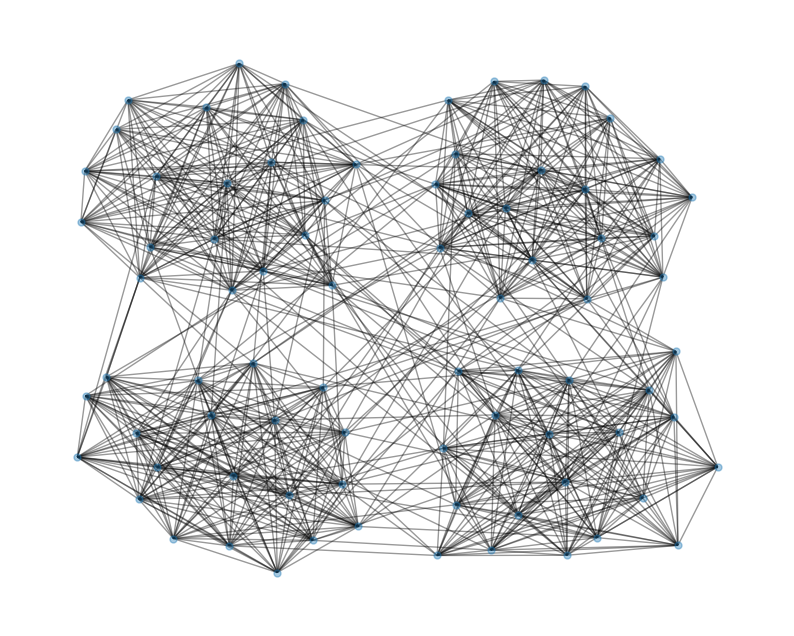

In [14]:
adjacency_matrix = probability_matrix > np.random.rand(num_of_vertices*num_of_communities, num_of_vertices*num_of_communities)  
G = nx.convert_matrix.from_numpy_array(adjacency_matrix)
nx.draw_kamada_kawai(G, with_labels=False, node_size=25, alpha=0.4, ax=plt.subplots(figsize=(10,8))[1])

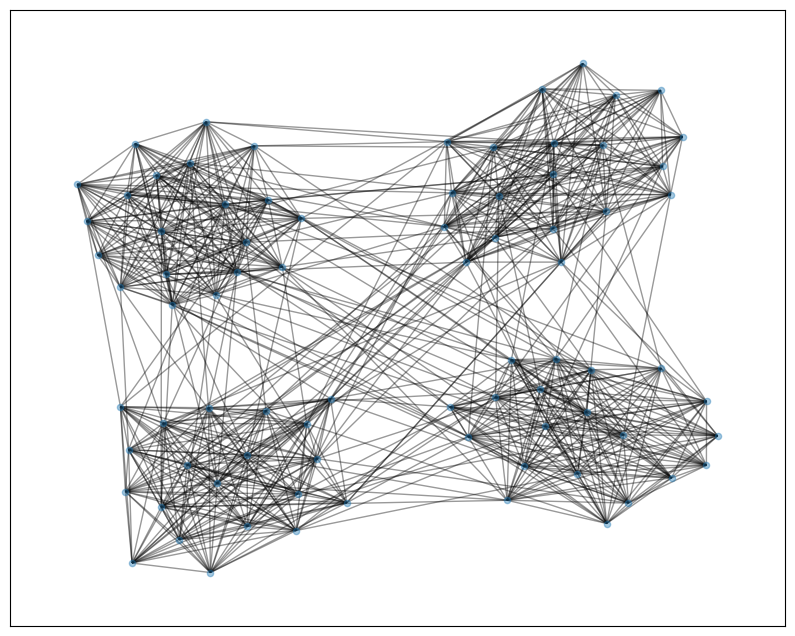

In [15]:
nx.draw_networkx(G, nx.spring_layout(G, iterations=1000), with_labels=False, node_size=20, alpha=0.4, ax=plt.subplots(figsize=(10,8))[1])

## P5.4

Draw a graph of the averaged coefficient of clustering of the WS
network against its parameter $p.$

In [16]:
def clustering_coefficient_WS(N: int, k: int, p: float, num_of_graphs: int = 100):
    # k - Each node is joined with its k nearest neighbors in a ring topology.
    result = 0.0
    for _ in range(num_of_graphs):
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, p)
        result += nx.average_clustering(G)
        
    return result / num_of_graphs

In [17]:
probabilities = np.linspace(0, 1, 10)

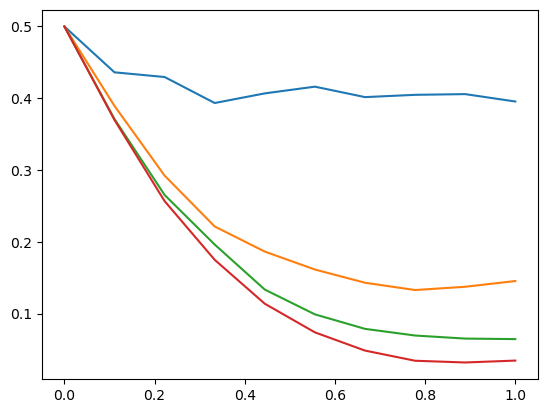

In [20]:
for N in [10, 25, 50, 100]: 
    plt.plot(probabilities, [clustering_coefficient_WS(N, 5, p) for p in probabilities])

## P5.6

Implement configuration model and test when the procedure
converge.

https://networkx.org/documentation/stable/_modules/networkx/generators/degree_seq.html#configuration_model

In [21]:
from itertools import chain
from random import shuffle

In [22]:
def configuration_model(degree_sequence):
    if np.sum(degree_sequence) % 2 != 0:
        raise ValueError("Invalid degree sequence!")
    
    N = len(degree_sequence)
    G = nx.empty_graph(N)
    
    # creating stub list for the degree sequence, e.g. [3, 2, 1] to [0, 0, 0, 1, 1, 2]
    stublist = list(chain.from_iterable([n] * d for n, d in enumerate(degree_sequence)))
    n = len(stublist)
    
    # splitting the stub list randomly in half
    output_list, input_list = stublist[:(n // 2)], stublist[(n // 2):]
    
    G.add_edges_from(zip(output_list, input_list))
    
    return G

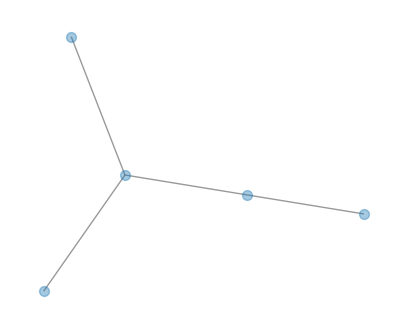

In [28]:
G = configuration_model([3, 2, 1, 1, 1])
nx.draw_kamada_kawai(G, with_labels=False, node_size=50, alpha=0.4, ax=plt.subplots(figsize=(5,4))[1])

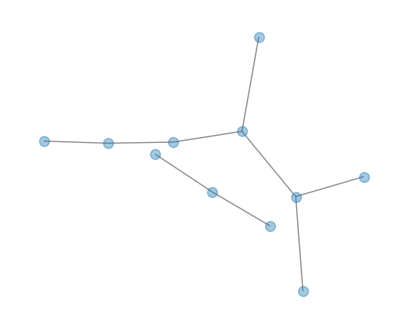

In [32]:
seq = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
G = configuration_model(seq)
nx.draw_kamada_kawai(G, with_labels=False, node_size=50, alpha=0.4, ax=plt.subplots(figsize=(5,4))[1])

In [43]:
seq = nx.random_powerlaw_tree_sequence(25)

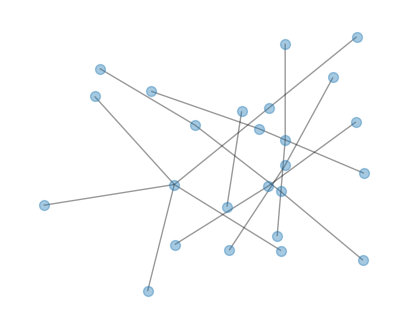

In [44]:
G = configuration_model(seq)
nx.draw_kamada_kawai(G, with_labels=False, node_size=50, alpha=0.4, ax=plt.subplots(figsize=(5,4))[1])

## P5.7

Compute partition function and distribution of the network with
given hamiltonian for the case with fixed number of edges.

https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics)

Let us assume that the number of edges $L$ is fixed.

$$
\langle k \rangle = \dfrac{2L}{N}
$$

$\langle k \rangle$ can be approximated using the expected value of a degree variable. 

$$ 
\langle k \rangle = \sum_k k p_k
$$

Langrange multipliers ($\mathbb{P}(G)$ is a probability distribution)
$$ 
\mathcal{L}(\mathbb{P}(G)) = - \sum_{G\in M_N} \mathbb{P}(G) \ln \mathbb{P}(G) + \lambda f(\mathbb{P}(G))
$$
with conditions
$$ 
\sum_k p_k - 1 = 0 \quad \text{and} \quad \sum_k k p_k - \dfrac{2L}{N} = 0
$$

Now, calculate the partial derivative with respect to $p_k$ and solve $\partial \mathcal{L} = 0.$

$$
0 = \dfrac{\partial}{\partial p_i} \left( - \sum_k p_k \ln p_k \right) + \dfrac{\partial}{\partial p_i} \left( \lambda_1 - \lambda_1 \sum_k p_k \right) + \dfrac{\partial}{\partial p_i} \left( \lambda_2 \dfrac{2L}{N} - \lambda_2 \sum_k k p_k \right) \\
= \left( - \ln p_i - 1 + \lambda_1 + \lambda_2 \cdot i \right)
$$

Which gives
$$
\ln p_i = \lambda_1 + i\lambda_2 - 1 \\
\Updownarrow \\
p_i = \exp \left( \lambda_1 + i\lambda_2 - 1 \right)
$$

We will calculate $\lambda_1$ based on the first condition.
$$
1 = \sum_k p_k = \sum_k \exp \left( \lambda_1 + i\lambda_2 - 1 \right)
$$

$$
1 = \exp( \lambda_1 - 1 ) \sum_k \exp(i \lambda_2)
$$

Let $Z$ denote $\sum_k \exp(i \lambda_2).$ Then, $\lambda_1$ can be calculated by

$$
\lambda_1 = - \ln(Z) + 1
$$

Also
$$
p_i = \dfrac{1}{Z} \exp (i\lambda_2)
$$

Entropy
$$
E = -\sum_k p_k \cdot \ln p_k = \sum_k p_k \left( \lambda_2 k - \ln(Z) \right) = -\lambda_2 \sum_k k p_k + \ln(Z) \sum_k p_k = -\lambda_2 \cdot \dfrac{2L}{N} + \ln(Z)
$$